In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_whole_pd = pd.read_csv('train.csv')

# get last 10% of data as test data
test_data = train_whole_pd.iloc[int(train_whole_pd.shape[0] * 0.9):, :]

In [24]:
def naive_bayes_report_edition(n):

    # get first n% of data as train data
    temp_train_data = train_whole_pd.iloc[:int(train_whole_pd.shape[0] * 0.9), :]
    train_data = temp_train_data.iloc[:int(temp_train_data.shape[0] * n), :]

    # Count the number of each label
    real = train_data[train_data['label'] == 0]
    real_count = real.shape[0]
    fake = train_data[train_data['label'] == 1]
    fake_count = fake.shape[0]

    # Total number of data
    total_rows = train_data.shape[0]
    assert total_rows == real_count + fake_count

    #import as nparray
    np_real = np.array(real)
    np_real = np_real[:, 1:-1]
    np_fake = np.array(fake)
    np_fake = np_fake[:, 1:-1]
    np_test = np.array(test_data)
    # np_test = np_test[:, 1:]
    np_test = np_test[:, 1:-1] # Exclusively for the report edition

    word_count = np_real.shape[1]

    real_sum = np.sum(np_real, axis=0)
    fake_sum = np.sum(np_fake, axis=0)

    all_real_tokens = np_real.sum()
    all_fake_tokens = np_fake.sum()

    predictions = []

    for i in range(test_data.shape[0]):

        log_prior_real = np.log(real_count / total_rows)
        log_prior_fake = np.log(fake_count / total_rows)

        smoothed_log_likelihood_real = np.sum(np_test[i] * np.log((real_sum + np.ones(real_sum.shape)) / (all_real_tokens + word_count)))
        smoothed_log_likelihood_fake = np.sum(np_test[i] * np.log((fake_sum + np.ones(fake_sum.shape)) / (all_fake_tokens + word_count)))

        log_pred_real = log_prior_real + smoothed_log_likelihood_real
        log_pred_fake = log_prior_fake + smoothed_log_likelihood_fake

        predictions.append((log_pred_fake > log_pred_real).astype(int))
    return predictions

In [40]:
train_size = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
accuracy = []
for i in train_size:
    accuracy.append(np.mean(naive_bayes_report_edition(i) == test_data['label']))

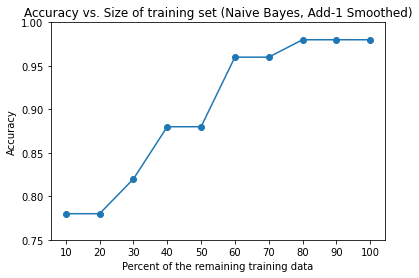

In [41]:
# Plot the accuracy vs. the size of the training set
plt.plot(train_size * 100, accuracy, 'o-')
plt.ylim(0.75, 1)
plt.xticks(train_size * 100)
plt.xlabel('Percent of the remaining training data')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Size of training set (Naive Bayes, Add-1 Smoothed)')
# Export plot as .png
plt.savefig('naive_bayes_report_edition.jpg')